In [22]:
#Importing Matplotlib to display images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


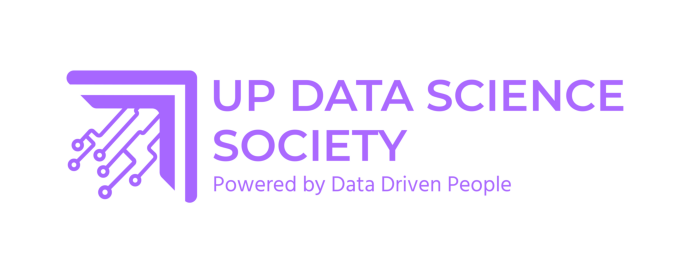

In [23]:
img = mpimg.imread('C:/Users/heber/Documents/hackerman/DSSOC/dssoc_logo.png')

plt.figure(figsize=(8.645, 6.578))

plt.imshow(img)
plt.axis('off')
plt.show()

# Introduction to Web Scraping using *BeautifulSoup*

Prepared by:
- Heberner Gaton

References:
- [What is Web Scraping and What is it Used For? | ParseHub](https://www.parsehub.com/blog/what-is-web-scraping/)
- [Ethical Web Scraping: Principles and Practices | DataCamp](https://www.datacamp.com/blog/ethical-web-scraping)
- [BeautifulSoup Tutorial by Tech With Tim](https://youtube.com/playlist?list=PLzMcBGfZo4-lSq2IDrA6vpZEV92AmQfJK&si=93UaFh479VmXhIiH)
- [Quotes to Scrape](https://quotes.toscrape.com/)
- [CoinMarketCap](https://coinmarketcap.com/)

Note:
- ChatGPT was used to debug some of the codes and write some parts of the notebook.


## [a] Introduction 
### What is web scraping?
Web scraping is the process of automatically extracting data from websites, which is useful for analyzing large amounts of information. It is commonly used for tasks like price comparison, market research, and trend analysis. However, it must be done ethically by respecting website rules, avoiding server overload, and using data responsibly.
### What is *BeautifulSoup*?
In this short web scraping course, we will use Python’s *BeautifulSoup* package, which is a powerful tool for extracting data from HTML and XML files. *BeautifulSoup* makes it easy to navigate, search, and modify the parse tree of a webpage, allowing us to retrieve specific information efficiently.
### Limitations of *BeautifulSoup*
However, *BeautifulSoup* has some limitations. It is primarily a parser and does not handle dynamic content loaded by JavaScript, so it may not work well with modern websites that rely heavily on client-side scripts. Additionally, for very large web pages or massive datasets, *BeautifulSoup* can be slower compared to other scraping tools or frameworks. Despite these limitations, it remains a popular and user-friendly choice for many web scraping tasks.
### Scope of this Course
This notebook will cover only the basics of web scraping. It is designed for complete beginners and focuses on introductory concepts to help the reader gain a functional understanding of *BeautifulSoup*. Also, this course will not tackle HTML in detail though HTML is useful for understanding this package.
Before proceeding with this course, the reader is expected to have a solid grasp of basic Python and HTML concepts and to have met the necessary software requirements.


### Installing beautifulsoup4
To start our web scraping journey, we first need to install BeautifulSoup4, the Python library that will allow us to extract and parse data from HTML and XML documents. BeautifulSoup provides simple methods and Pythonic ways to navigate, search, and modify web page content.

We can install it using the following command in your terminal or notebook:

In [5]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


It is also recommended to install the *requests* library, which will allow us to retrieve the HTML content of a web page:

In [6]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


Now that they're installed, we can now import these packages:

In [7]:
from bs4 import BeautifulSoup
import requests

*Yay!* We are now ready to start our web scraping journey. The next parts will explore 2 basic examples of web scraping so that we can easily apply *BeautifulSoup*.

## [b] Scraping Quotes from a Website

In this part, we will try to scrape quotes from the (in)famous [Quotes to Scrape Website](https://quotes.toscrape.com/). The website is specifically designed for beginner web scrapers (like us!). Now, in this part we will scrape all the quotes, with their respective authors, from the first page and present them cleanly in Python.

First, we should make sure that we have the *BeautifulSoup* and *requests* packages installed and imported. But since we already did that at the previous part of this notebook, we will skip that step. But if you're web scraping by yourself, please do not forget to do that part. 

Next, we will set up the "environment" that we will scrape. We will do that using these codes: 

In [8]:
url = "https://quotes.toscrape.com/"
page = requests.get(url).text
doc = BeautifulSoup(page, "html.parser")

To explain what's happening:
1. The first line is just assigning a variable for the URL of the website we want to scrape.
2. The second line uses the requests library to send an HTTP GET request to the website stored in url.
    - **requests.get(url)** fetches the web page’s content from the server and returns a Response object.
    - **.text** extracts the HTML content of that page as a regular Python string (decoded using the website’s detected character encoding).
3. The third line uses BeautifulSoup for parsing HTML and XML.
    - The function **BeautifulSoup(page, "html.parser")** converts the plain HTML string into a structured “soup” object that is easy to search and navigate.
    - The **"html.parser"** argument tells *BeautifulSoup* to use Python’s built-in HTML parser.
    - The variable **doc** is arbitrary and is just there as a variable. It will make sense later.

For the third step, we will now use our HTML skills to inspect the website. 
- First, we will right click the part of the [website](https://quotes.toscrape.com/) where the quote is, and click *inspect*. 
- Now, observe from the right side of the screen that there's an HTML code -- that is the layout of the website. 
- We will now find the *class* in which the quote blocks are in. Find the highlighted part which contains the quote and the author. If the part highlighted does not correspond to the quote block, hover your cursor to find the correct part. The class is found usually at the top of the highlighted part with the keyword "class". Again, we want the class that contains the parts we want to get and it may not be the most specific among the classes but it should be the smallest class that contains the part we want.

Wait, that was a lot! To digest that, try observing this figure: 

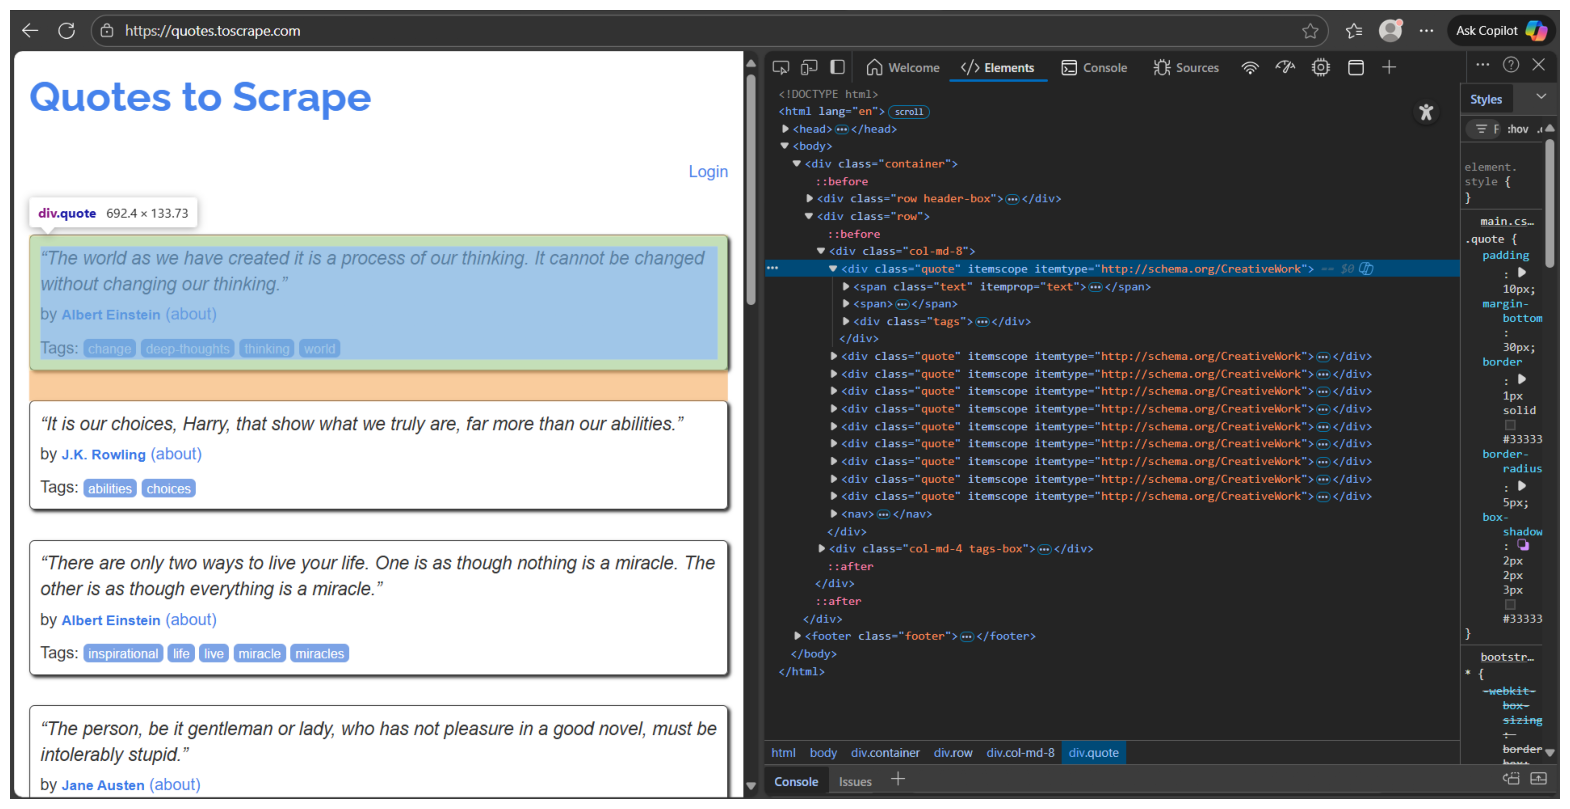

In [17]:
img = mpimg.imread('C:/Users/heber/Documents/hackerman/DSSOC/fig1.png')

plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')
plt.show()


In this case, the class encompassing the quote block is "quote". We will now write this code:

In [10]:
div = doc.find_all(class_="quote")

This line uses *.find_all()* to search the entire web page and collect every HTML tag with class="quote". Try printing *div*! You will see that it is a snippet of the HTML code which contains all parts that are under the class "quote".

Now, for the final part of our quote-scraping journey, we will introduce a *for-loop* that will make it easier for us to get the quotes and authors in the webpage and present them in a systematic way. The code is as follows:

In [11]:
for d in div:
    quote = d.find(class_="text").get_text()
    author = d.find(class_="author").get_text()
    print(quote, "-", author)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” - Albert Einstein
“It is our choices, Harry, that show what we truly are, far more than our abilities.” - J.K. Rowling
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” - Albert Einstein
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” - Jane Austen
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” - Marilyn Monroe
“Try not to become a man of success. Rather become a man of value.” - Albert Einstein
“It is better to be hated for what you are than to be loved for what you are not.” - André Gide
“I have not failed. I've just found 10,000 ways that won't work.” - Thomas A. Edison
“A woman is like a tea bag; you never know how strong it is until it's in hot water.” - Eleanor Roos

To explain the final part of our code:
- The loop allows us to use the .find() method to locate the quote text and author elements, extracting each quote and its author from every quote block on the webpage.
- The *.get_text()* method  is used to remove the HTML tags and just keep the texts we desire. 
- Lastly, the print function is there to paste the quote and corresponding author next to each other. 

That's it, we did our first data scraping project! The next part is more of a practical application of web-scraping. Before we do that, here are some mini-exercises to apply what we've learned in this part. 

### Mini-Exercise no. 1

1. Extract the quotes about friendship along with their respective author. 
2. Among these quotes you've extracted, which most resonates to you, and why?

## [c] Prices of the Top 10 Cryptocurrencies

In this part, we will try to scrape the Top 10 Cryptocurrencies in the United States and their prices from this [webpage](https://coinmarketcap.com/). We will only focus on the Top 10 because they're the only parts of the table that are ran by HTML (the other parts are run by JavaScript which can't be processed by *BeautifulSoup*). This example is adapted from tutorial videos of Tech With Tim which also delves on the basics of BeautifulSoup. 

Just like the previous part, we will first make sure that we have *BeautifulSoup* and *requests* packages installed and imported. Again, we will not do it here since we already did it in the first part, just make sure to run the import codes again to not have any problem. 

Next, we will also set up the environment that we want to scrape. We will use the codes:

In [12]:
url1 = "https://coinmarketcap.com"
result1 = requests.get(url1).text
doc1 = BeautifulSoup(result1, "html.parser")

This step has the same explanation with the previous part. We just changed the URL (as we are scraping a different webpage), and the variable names to distinguish it from the variables used in the previous part. 

Next, we will go to the [webpage](https://coinmarketcap.com/) and *"right-click and inspect"* just like the last part. It should look like this:

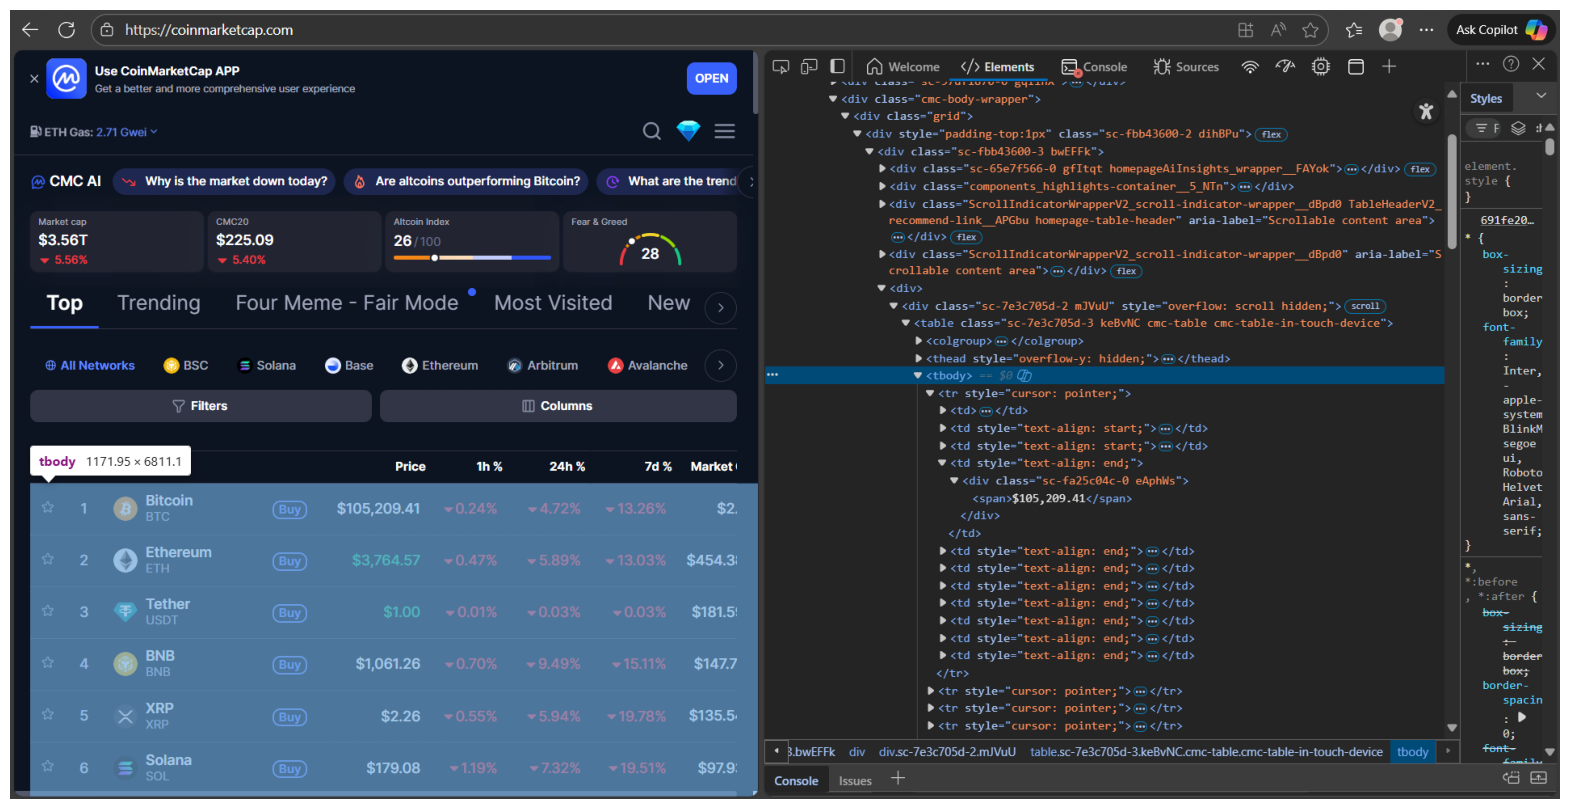

In [18]:
img = mpimg.imread('C:/Users/heber/Documents/hackerman/DSSOC/fig2.png')

plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

Observe that the table is encompassed by <tbody> in HTML. We will approach getting this differently. Hence, we will write the code as follows:

In [13]:
tbody = doc1.tbody
trs = tbody.contents

To explain the code line-by-line:
1. **doc1**, as assigned in the previous code chunk, is a BeautifulSoup object that contains the entire parsed HTML of a webpage.
2. **.tbody** looks for the first *tbody* tag in the HTML.

Now, in this example, we will present the data different to how we presented the data in the previous part. In this part, we will use python dictionaries. To do that, we will first initialize a dictionary.

In [14]:
prices = {}

Then, we will do the for-loop approach just like what we did with the previous part. 

In [15]:
for tr in trs[:10]:
    name, price = tr.contents[2:4]
    fixed_name = name.p.string
    fixed_price = price.span.string

    prices[fixed_name] = fixed_price

To explain the code line-by-line:
1. The for loop goes through each of these 10 rows one by one. So in each loop, tr represents a single row (like one coin’s data).
    - **trs** is a list of all *tr* elements (table rows) that we got earlier from tbody.contents.
    - **trs[:10]** means to take only the first 10 rows because that is our only focus.
2. In the second line, *tr.contents* gives a list of these child tags (*.contents* is a method from *BeautifulSoup*).
    - Taking **[2:4]** means we’re selecting only the 3rd and 4th elements, which correspond to:
        - The name cell (coin name)
        - The price cell (current price)
3. In the third line, **name.p** finds that *p* tag inside the name cell. Also, *.string* extracts the text content (“Bitcoin” for example) without the HTML tags.
    - Now you may ask, why *p*? Well, if we take a stop and try printing the *name* variable, we could find the name of the cryptocurrencies in the middle of *p* tags (verify as an exercise). Instead of using classes, which may not have a pattern among different cryptocurrencies, we can use *p* as a locator instead.
4. In the fourth line, **price.span** finds the *span* tag. Also, *.string* gets just the text inside.
    - In this case, the price is wrapped around *span* tag (you may also verify as an exercise)
5. In the last line, prices is a dictionary we created earlier to store name–price pairs. This line adds a new entry to the dictionary where the *key* is the coin name (fixed_name) and the *value* is the price (fixed_price).
    - If you're confused by this, please recall python dictionaries from previous lessons. 

*Whew!* That was a lot. Please take a deep breath first.

Now, we can just add the final part of our code, which is to print the prices dictionary to display the prices.

In [16]:
print(prices)

{'Bitcoin': '$112,620.39', 'Ethereum': '$3,994.09', 'Tether': '$1.00', 'XRP': '$2.62', 'BNB': '$1,126.47', 'Solana': '$195.28', 'USDC': '$0.9998', 'Dogecoin': '$0.1992', 'TRON': '$0.2971', 'Cardano': '$0.6629'}


We did it! Now to master what we've learned, below is a mini-exercise to test what you've learned.

### Mini-Exercise no. 2

1. Create a DataFrame of the Top 10 cryptocurrencies with their current prices. Include additional columns showing their percentage growth over:
    - 1 hour
    - 24 hours
    - 7 days

**Hint: Use the pandas package to organize your data

That concludes this notebook on data scraping. Should you decide to take your web scraping to the next level, I hope that this notebook helped you be acquainted with the basic functions of *BeautifulSoup*. I suggest to master the *BeautifulSoup* package by creating your own web-scraping projects. 